In [2]:
import pickle
import pandas as pd
import numpy as np
import detectda as dtda
import matplotlib.pyplot as plt
from skimage import filters
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
from joblib import Parallel, delayed
from scipy.stats import mode

In [3]:
import bcc

In [4]:
cov_data = np.load("Experiment3_MVN_Data.npy")

In [5]:
#cov_data_sav = pd.concat([pd.DataFrame(arr) for arr in cov_data], keys=np.arange(1, len(cov_data)+1))
#cov_data_sav.to_csv("cov_data_sav.csv")

In [6]:
file=open('experiment3_data.pickle', 'rb')
exp3=pickle.load(file)

In [7]:
exp3.keys()

dict_keys(['bcc_cov', 'cf_cov', 'kcp_cov', 'cf_cov_raw', 'norm_cov'])

In [8]:
bclr_cov = exp3['bcc_cov']
cf_cov = exp3['cf_cov']
kcp_cov = exp3['kcp_cov']
cf_cov_raw = exp3['cf_cov_raw']
norm_cov = exp3['norm_cov']

In [9]:
cp_bclr_cov = np.array([bclr.post_k_mode for bclr in bclr_cov])
cp_cf_cov = np.array([a['best_split'] for a in cf_cov])
cp_cf_cov_raw = np.array([a['best_split'] for a in cf_cov_raw])
cp_kcp_cov = np.array([a[0] for a in kcp_cov])
cp_norm_cov = np.array([a[0] for a in norm_cov])

In [10]:
cp_bclr_beta = np.array([bclr.post_beta_mean for bclr in bclr_cov])
betas = np.mean(cp_bclr_beta, axis=0)

In [11]:
cp_bclr_beta.shape

(1000, 14)

In [12]:
plt.rcParams["font.family"] = "Nunito"

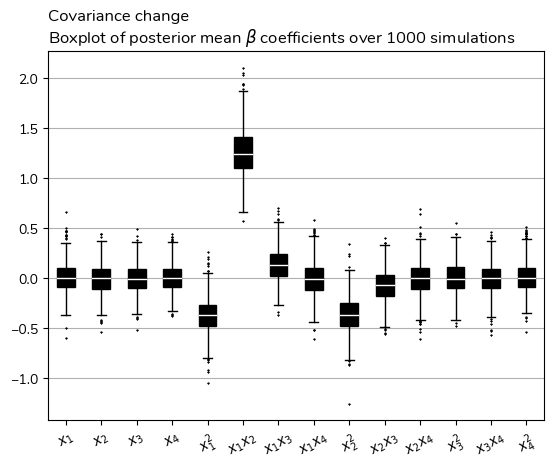

In [17]:
powers = np.array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [2, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 0, 0, 1],
       [0, 2, 0, 0],
       [0, 1, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 2, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 2]])

names = [r'$x_1$', r'$x_2$', r'$x_3$', r'$x_4$', r'$x_1^2$', r'$x_1x_2$', r'$x_1x_3$', r'$x_1x_4$',
        r'$x_2^2$', r'$x_2x_3$', r'$x_2x_4$', r'$x_3^2$', r'$x_3x_4$', r'$x_4^2$']

fig, ax = plt.subplots()
ax.yaxis.grid(True)
bp = ax.boxplot(x=cp_bclr_beta, labels=names, sym='*', patch_artist=True)
plt.setp(bp['fliers'], markersize=1.0)
plt.xticks(rotation=30)
plt.setp(bp["boxes"], facecolor="black")
plt.setp(bp["medians"], color="white")
ax.set_title("Covariance change\nBoxplot of posterior mean "+str(r'$\beta$')+" coefficients over 1000 simulations", loc='left')
plt.savefig("BoxplotCov.pdf")

In [47]:
def rmse(x):
    return np.sqrt(np.mean(x**2))

cp_bclr_mses_cov = [rmse(bclr.post_k-200)  for bclr in bclr_cov]

In [51]:
np.std(cp_bclr_mses_cov)

13.202323796760279

In [43]:
print("RMSE for bclr: %0.3f" % np.sqrt(np.mean((cp_bclr_cov-200)**2)))

print("Probability k=200 for bclr: %0.3f" % np.mean(np.array(cp_bclr_cov)==200))

RMSE for bclr: 18.463
Probability k=200 for bclr: 0.141


In [ ]:
print("MSE for CF: %0.3f" % np.mean((cp_cf_cov-200)**2))

print("Probability k=200 for CF: %0.3f" % np.mean(np.array(cp_cf_cov)==200))

In [ ]:
print("MSE for CF: %0.3f" % np.mean((cp_cf_cov_raw-200)**2))

print("Probability k=200 for CF: %0.3f" % np.mean(np.array(cp_cf_cov_raw)==200))

In [ ]:
print("MSE for CF: %0.3f" % np.mean((cp_kcp_cov-200)**2))

print("Probability k=200 for CF: %0.3f" % np.mean(np.array(cp_kcp_cov)==200))

In [ ]:
print("MSE for CF: %0.3f" % np.mean((cp_norm_cov-200)**2))

print("Probability k=200 for CF: %0.3f" % np.mean(np.array(cp_norm_cov)==200))